In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math



In [3]:
df = pd.read_csv('Copy of Parcel_Report_June_23_22_10_31_23_No_Student_Info (1).xlsx - All Parcels Report (by RECEIVED).csv')

df

,Parcel Type Description 1,Shipping Type Description,Parcel Status Description 2,Issue Date,Receipt Date,Entry Parcel ID,Processor NetID,Mail Room Description 3,Description 4,Receipt Date Only
0,Package,UPS,Issued,6/23/23 19:55,6/23/23 10:02,1860901,NaN,North Campus Service Center,PR,6/23/23
1,Letter,USPS,Issued,7/1/2023,6/23/23 10:03,1860899,NaN,North Campus Service Center,m1,6/23/23
2,Envelope,UPS,Issued,6/23/23 14:07,6/23/23 10:03,1860900,NaN,North Campus Service Center,E,6/23/23
3,Package,UPS,Issued,6/23/23 12:14,6/23/23 10:07,1860902,NaN,North Campus Service Center,PR,6/23/23
4,Package,UPS,Issued,6/23/23 20:03,6/23/23 10:07,1860903,NaN,North Campus Service Center,PR,6/23/23
...,...,...,...,...,...,...,...,...,...,...
94976,Package,USPS,Received,NaN,10/31/23 20:50,1956108,NaN,North Campus Service Center,s,10/31/23
94977,Package,USPS,Received,NaN,10/31/23 20:51,1956110,NaN,North Campus Service Center,s,10/31/23
94978,Envelope,USPS,Received,NaN,10/31/23 20:51,1956111,NaN,North Campus Service Center,E-XL,10/31/23
94979,Envelope,USPS,Received,NaN,10/31/23 20:52,1956112,NaN,North Campus Service Center,e,10/31/23


In [4]:
df.drop(df.loc[df['Mail Room Description 3']!="North Campus Service Center"].index, inplace=True)
df

,Parcel Type Description 1,Shipping Type Description,Parcel Status Description 2,Issue Date,Receipt Date,Entry Parcel ID,Processor NetID,Mail Room Description 3,Description 4,Receipt Date Only
0,Package,UPS,Issued,6/23/23 19:55,6/23/23 10:02,1860901,NaN,North Campus Service Center,PR,6/23/23
1,Letter,USPS,Issued,7/1/2023,6/23/23 10:03,1860899,NaN,North Campus Service Center,m1,6/23/23
2,Envelope,UPS,Issued,6/23/23 14:07,6/23/23 10:03,1860900,NaN,North Campus Service Center,E,6/23/23
3,Package,UPS,Issued,6/23/23 12:14,6/23/23 10:07,1860902,NaN,North Campus Service Center,PR,6/23/23
4,Package,UPS,Issued,6/23/23 20:03,6/23/23 10:07,1860903,NaN,North Campus Service Center,PR,6/23/23
...,...,...,...,...,...,...,...,...,...,...
94976,Package,USPS,Received,NaN,10/31/23 20:50,1956108,NaN,North Campus Service Center,s,10/31/23
94977,Package,USPS,Received,NaN,10/31/23 20:51,1956110,NaN,North Campus Service Center,s,10/31/23
94978,Envelope,USPS,Received,NaN,10/31/23 20:51,1956111,NaN,North Campus Service Center,E-XL,10/31/23
94979,Envelope,USPS,Received,NaN,10/31/23 20:52,1956112,NaN,North Campus Service Center,e,10/31/23


In [5]:
issue = df["Issue Date"]
receipt = df["Receipt Date"]

def cleanDates(val):
    if val != val:
        return None
    try:
        space = val.index(" ")
        sub = val[:space]
        print(sub)
        return datetime.strptime(sub, '%m/%d/%y')
    except:
        return datetime.strptime(val, '%m/%d/%Y')

new_issue = issue.apply(cleanDates)
new_receipt = receipt.apply(cleanDates)
df["Issue Date"] = new_issue
df["Receipt Date"] = new_receipt
df


6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
7/19/23
6/23/23
6/23/23
7/4/23
6/23/23
6/23/23
6/23/23
6/23/23
6/24/23
6/24/23
6/26/23
6/24/23
6/23/23
6/26/23
6/26/23
6/30/23
7/7/23
7/7/23
6/23/23
6/26/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/23/23
6/26/23
6/24/23
6/23/23
6/23/23
6/25/23
6/28/23
6/24/23
6/23/23
6/23/23
6/26/23
6/25/23
6/23/23
7/19/23
6/24/23
6/23/23
6/30/23
6/23/23
6/26/23
6/25/23
6/25/23
6/23/23
6/23/23
6/23/23
6/25/23
6/23/23
6/24/23
6/23/23
6/25/23
6/23/23
6/24/23
6/25/23
6/23/23
6/23/23
6/28/23
6/24/23
6/23/23
6/23/23
6/25/23
6/26/23
6/23/23
6/23/23
6/23/23
6/24/23
6/26/23
6/23/23
6/26/23
6/23/23
6/23/23
6/23/23
6/27/23
6/24/23
6/23/23
6/24/23
6/26/23
6/23/23
6/25/23
6/23/23
6/23/23
6/26/23
6/26/23
6/23/23
6/23/23
6/23/23
6/24/23
6/24/23
6/24/23
6/24/23
7/11/23
6/24/23
6/26/23
7/7/23
6/24/23
6/24/23
6/26/23
6/27/23
6/24/23
6/27/23
6/26/23
6/24/23
7/4/23
6/24/23
6/24/23
6/25/23
6/25/23
6/25/23
6/24/23
6/25/23
7/11/23
6/26/

,Parcel Type Description 1,Shipping Type Description,Parcel Status Description 2,Issue Date,Receipt Date,Entry Parcel ID,Processor NetID,Mail Room Description 3,Description 4,Receipt Date Only
0,Package,UPS,Issued,2023-06-23,2023-06-23,1860901,NaN,North Campus Service Center,PR,6/23/23
1,Letter,USPS,Issued,2023-07-01,2023-06-23,1860899,NaN,North Campus Service Center,m1,6/23/23
2,Envelope,UPS,Issued,2023-06-23,2023-06-23,1860900,NaN,North Campus Service Center,E,6/23/23
3,Package,UPS,Issued,2023-06-23,2023-06-23,1860902,NaN,North Campus Service Center,PR,6/23/23
4,Package,UPS,Issued,2023-06-23,2023-06-23,1860903,NaN,North Campus Service Center,PR,6/23/23
...,...,...,...,...,...,...,...,...,...,...
94976,Package,USPS,Received,NaT,2023-10-31,1956108,NaN,North Campus Service Center,s,10/31/23
94977,Package,USPS,Received,NaT,2023-10-31,1956110,NaN,North Campus Service Center,s,10/31/23
94978,Envelope,USPS,Received,NaT,2023-10-31,1956111,NaN,North Campus Service Center,E-XL,10/31/23
94979,Envelope,USPS,Received,NaT,2023-10-31,1956112,NaN,North Campus Service Center,e,10/31/23


In [6]:
df.drop(df.loc[df['Receipt Date']<datetime(2023,8,1)].index, inplace=True)
df

,Parcel Type Description 1,Shipping Type Description,Parcel Status Description 2,Issue Date,Receipt Date,Entry Parcel ID,Processor NetID,Mail Room Description 3,Description 4,Receipt Date Only
4753,Package,USPS,Issued,2023-08-02,2023-08-01,1865697,NaN,North Campus Service Center,pr-br,8/1/23 8
4754,Package,USPS,Issued,2023-08-02,2023-08-01,1865698,NaN,North Campus Service Center,br,8/1/23 8
4755,Package,USPS,Issued,2023-08-02,2023-08-01,1865699,NaN,North Campus Service Center,br,8/1/23 8
4756,Package,(Please Select Type),Issued,2023-08-02,2023-08-01,1865700,NaN,North Campus Service Center,br,8/1/23 8
4757,(Select from List),USPS,Issued,2023-08-02,2023-08-01,1865701,NaN,North Campus Service Center,br,8/1/23 8
...,...,...,...,...,...,...,...,...,...,...
94976,Package,USPS,Received,NaT,2023-10-31,1956108,NaN,North Campus Service Center,s,10/31/23
94977,Package,USPS,Received,NaT,2023-10-31,1956110,NaN,North Campus Service Center,s,10/31/23
94978,Envelope,USPS,Received,NaT,2023-10-31,1956111,NaN,North Campus Service Center,E-XL,10/31/23
94979,Envelope,USPS,Received,NaT,2023-10-31,1956112,NaN,North Campus Service Center,e,10/31/23


In [7]:
df["Pick Up Time"] = df["Issue Date"]-df["Receipt Date"]

pickUp = df["Pick Up Time"]

def convertToDays(val):
    if val != val:
        return None
    return val.total_seconds()/60/60/24

new_pickUp = pickUp.apply(convertToDays)
df["Pick Up Time"] = new_pickUp
df

,Parcel Type Description 1,Shipping Type Description,Parcel Status Description 2,Issue Date,Receipt Date,Entry Parcel ID,Processor NetID,Mail Room Description 3,Description 4,Receipt Date Only,Pick Up Time
4753,Package,USPS,Issued,2023-08-02,2023-08-01,1865697,NaN,North Campus Service Center,pr-br,8/1/23 8,1.0
4754,Package,USPS,Issued,2023-08-02,2023-08-01,1865698,NaN,North Campus Service Center,br,8/1/23 8,1.0
4755,Package,USPS,Issued,2023-08-02,2023-08-01,1865699,NaN,North Campus Service Center,br,8/1/23 8,1.0
4756,Package,(Please Select Type),Issued,2023-08-02,2023-08-01,1865700,NaN,North Campus Service Center,br,8/1/23 8,1.0
4757,(Select from List),USPS,Issued,2023-08-02,2023-08-01,1865701,NaN,North Campus Service Center,br,8/1/23 8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
94976,Package,USPS,Received,NaT,2023-10-31,1956108,NaN,North Campus Service Center,s,10/31/23,NaN
94977,Package,USPS,Received,NaT,2023-10-31,1956110,NaN,North Campus Service Center,s,10/31/23,NaN
94978,Envelope,USPS,Received,NaT,2023-10-31,1956111,NaN,North Campus Service Center,E-XL,10/31/23,NaN
94979,Envelope,USPS,Received,NaT,2023-10-31,1956112,NaN,North Campus Service Center,e,10/31/23,NaN


1817
0.03164678219977358


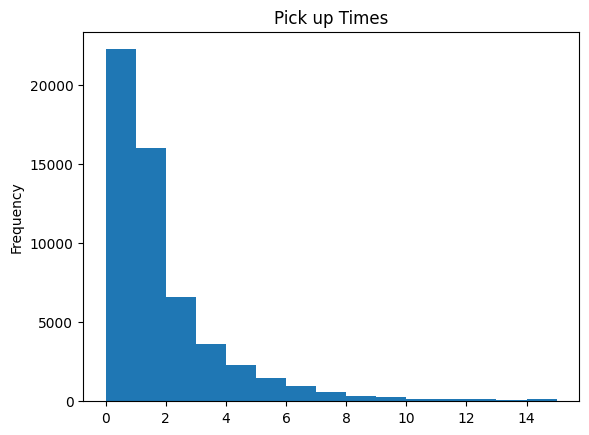

In [22]:
plot = df["Pick Up Time"].plot(kind = 'hist',bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plot.set_title("Pick up Times")
nan = df["Pick Up Time"].isnull().sum()
print(nan)
print(nan/57415)


In [21]:
import matplotlib.dates as mdates
# receipt = df["Receipt Date"]
# def convertToString(val):
#     if val != val:
#         return None
#     return str(val)

# string_receipt = receipt.apply(convertToString)
# df["Reciept Date"] = string_receipt

# grouped_df = df.groupby('Reciept Date').size().to_frame("count").reset_index()

# grouped_df.plot(kind='hist', x='Reciept Date', y='count',bins=50)
# df['Reciept Date'] = df['Reciept Date'].astype(int)
# df['Reciept Date'] = pd.to_datetime(df['Reciept Date'], unit='s')
# plot = df["Reciept Date"].plot(kind = 'hist')

mpl_data = mdates.epoch2num(df['Reciept Date'])

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()


AttributeError: module 'matplotlib.dates' has no attribute 'epoch2num'